In [9]:
import seml
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

### Setup

Using 2 functions to plot:
- `analyze_and_plot_jitter_means`
- `analyze_and_plot_jitter_medians`

Plotting 2 different settings:
- encoding *organism, dataset* and **cell types**
- encoding just encoding *organism, dataset*

Plotting 2 different metrics:
- number of shared_top_genes
- $R^2$ of means of gene expression

And 2 datasets:
- db/db
- mSTZ

At the end looking at the performance over the cell types, I am making that round plot plotting all the datasets in a circle and the performace of the cell types around the plot

#### Encoding *organism, dataset* and **cell types** - Means

Plotting the means of this setting

## Make preformance plots

Steps:
- decide on the final plots -> I am plotting jittered points with medians, colored by the split **DONE**
- make plots pretty **DONE**
- insert in presentation
- think about interpretation

In [61]:
results = seml.get_results("THE_final_run", to_data_frame=True, parallel=True)

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

In [62]:
results_full = seml.get_results("full_genes_big_data_w_and_wo_ct_encoding_10_reps", to_data_frame = True, parallel=True)

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

In [ ]:
results = seml.get_results("full_genes_w_and_wo_cell_types_with_combination_and_seperate_10_reps_no_save", to_data_frame=True, parallel=True)
results["config.encode_ct"] = False
results = results[['config.addl_dataset_train', 'config.cov_embed_dims',
       'config.dataset_ground_truth1', 'config.dataset_ground_truth2',
       'config.dataset_to_predict', 'config.dropout_rate', 'config.encode_ct',
       'config.kl_weight', 'config.learning_rate', 'config.max_epochs',
       'config.n_hidden', 'config.n_latent', 'config.n_layers',
       'config.save_folder_name', 'config.save_models', 'config.seed',
       'config.shared_top', 'config.weight_decay', 'result.r2_dbdb_healthy',
       'result.r2_dbdb_OOD', 'result.r2_mSTZ_healthy', 'result.r2_mSTZ_OOD',
       'result.shared_top_genes_dbdb', 'result.scores_corr_dbdb',
       'result.pvals_adj_corr_dbdb', 'result.scores_ranks_corr_dbdb',
       'result.shared_top_genes_mSTZ', 'result.scores_corr_mSTZ',
       'result.pvals_adj_corr_mSTZ', 'result.scores_ranks_corr_mSTZ',
       'result.pancreatic_D_cell_r2_dbdb_healthy',
       'result.pancreatic_D_cell_r2_dbdb_OOD',
       'result.pancreatic_D_cell_r2_mSTZ_healthy',
       'result.pancreatic_D_cell_r2_mSTZ_OOD',
       'result.type_B_pancreatic_cell_r2_dbdb_healthy',
       'result.type_B_pancreatic_cell_r2_dbdb_OOD',
       'result.type_B_pancreatic_cell_r2_mSTZ_healthy',
       'result.type_B_pancreatic_cell_r2_mSTZ_OOD',
       'result.pancreatic_A_cell_r2_dbdb_healthy',
       'result.pancreatic_A_cell_r2_dbdb_OOD',
       'result.pancreatic_A_cell_r2_mSTZ_healthy',
       'result.pancreatic_A_cell_r2_mSTZ_OOD',
       'result.pancreatic_A_cell_shared_top_genes_dbdb_',
       'result.pancreatic_A_cell_scores_corr_dbdb_',
       'result.pancreatic_A_cell_pvals_adj_corr_dbdb_',
       'result.pancreatic_A_cell_scores_ranks_corr_dbdb_',
       'result.pancreatic_A_cell_shared_top_genes_mSTZ_',
       'result.pancreatic_A_cell_scores_corr_mSTZ_',
       'result.pancreatic_A_cell_pvals_adj_corr_mSTZ_',
       'result.pancreatic_A_cell_scores_ranks_corr_mSTZ_',
       'result.n_cells_train']].drop_duplicates(keep="first")

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

In [94]:
results_full = results_full[~results_full["config.embed_ct"]]

In [96]:
results = pd.concat([results, results_full])

In [197]:
num_of_genes_plot = results[["config.addl_dataset_train", 'result.n_cells_train']].drop_duplicates(keep = "first")

In [205]:
import scanpy as sc

In [206]:
adata = sc.read_h5ad("/d/hpc/projects/FRI/DL/mo6643/MSC/data/data_update_slack/data_splits/data_splits_train_merge/train_data/full_datasets/train_adata_baseline.h5ad")

In [207]:
adata

AnnData object with n_obs × n_vars = 204754 × 15457
    obs: 'disease', 'dataset', 'organism', 'cell_type', 'n_counts'

In [212]:
204754*2

409508

In [214]:
num_of_genes_plot

,config.addl_dataset_train,result.n_cells_train
0,train_adata_baseline.h5ad,409508
1,embedding_top30_mouse.h5ad,301066
2,extra_human_neonatal.h5ad,215282
3,random_mouse_seed_42.h5ad,259623
4,extra_human_chem.h5ad,220755
5,embedding_top50_mouse.h5ad,334183
6,embedding_top70_human.h5ad,650336
7,extra_mouse_aged.h5ad,222115
8,embedding_top50_human.h5ad,513058
9,extra_mouse_T1D.h5ad,244686


In [220]:
num_of_genes_plot.loc[num_of_genes_plot["config.addl_dataset_train"] == "train_adata_baseline.h5ad", "result.n_cells_train"] = 409508/2

In [223]:
num_of_genes_plot.sort_values('result.n_cells_train', inplace=True)

In [226]:
num_of_genes_plot["config.addl_dataset_train"] = [elm.split(".")[0].replace("_", " ") for elm in num_of_genes_plot["config.addl_dataset_train"]]

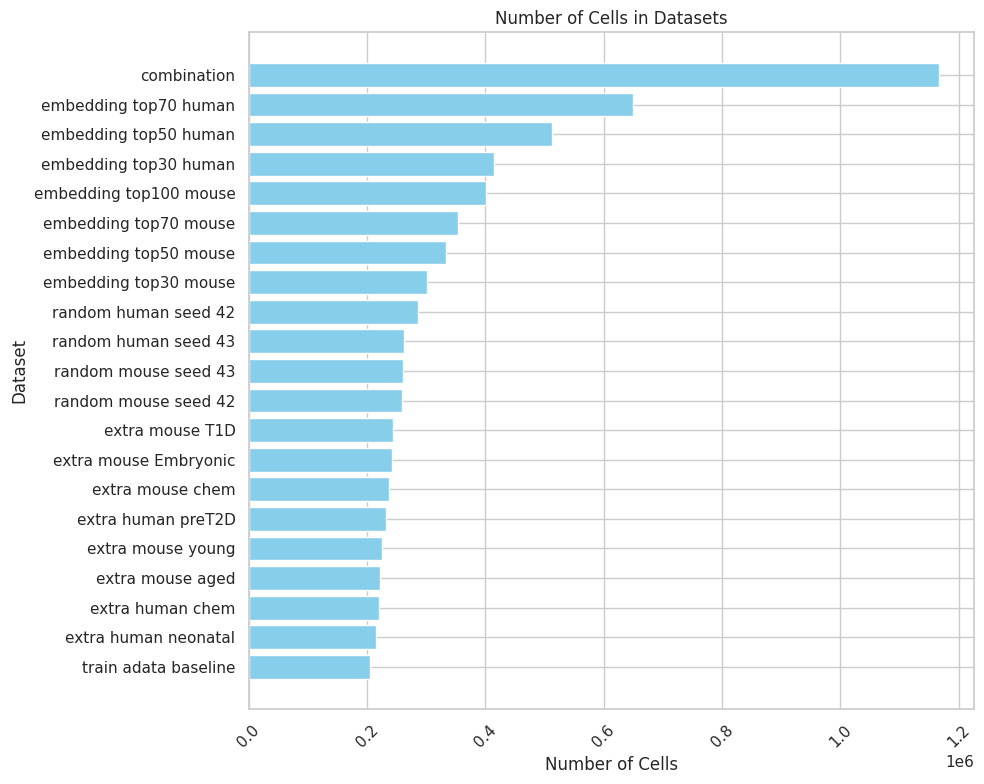

In [227]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(num_of_genes_plot['config.addl_dataset_train'], num_of_genes_plot['result.n_cells_train'], color='skyblue')
plt.xlabel('Number of Cells')
plt.ylabel('Dataset')
plt.title('Number of Cells in Datasets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("./figs/number_of_cells_plt.png")
plt.show()


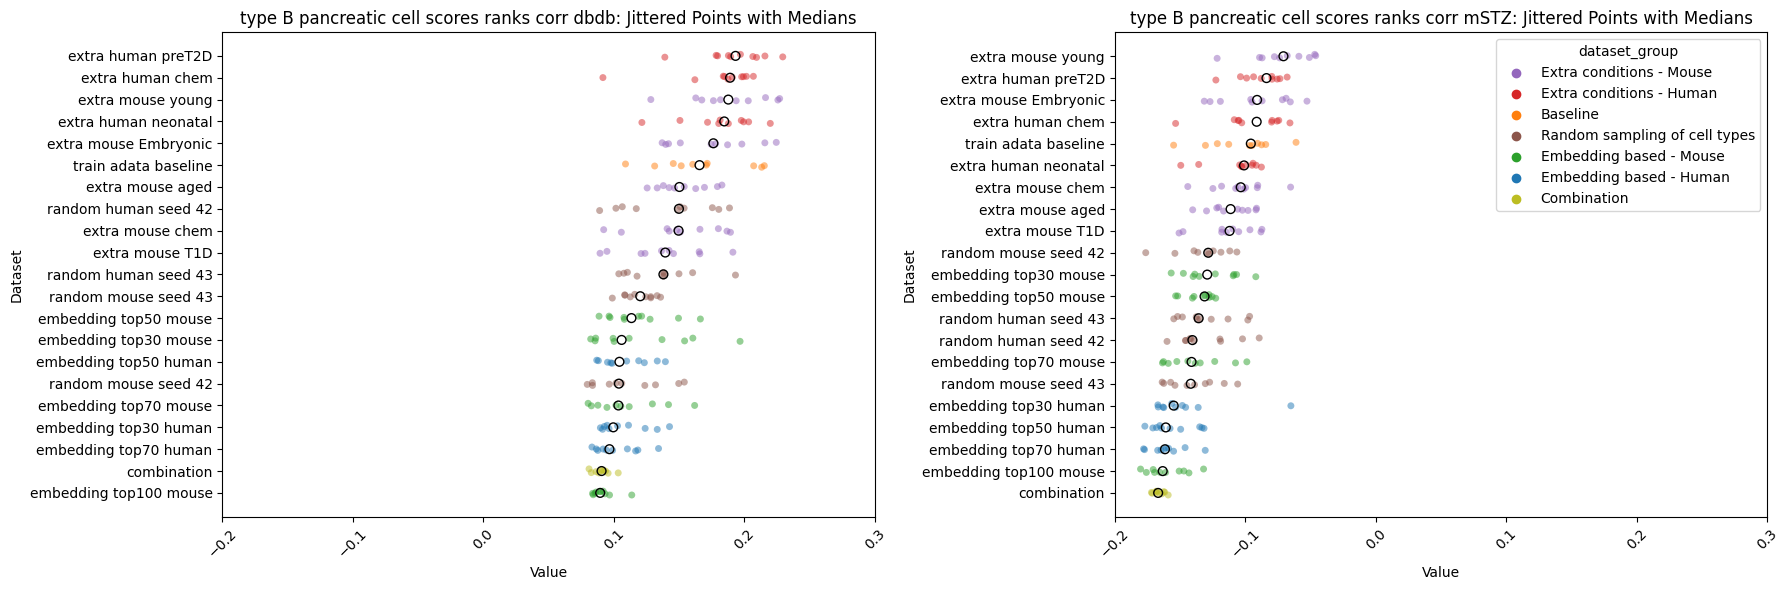

In [111]:
focused_columns = ['result.type_B_pancreatic_cell_scores_ranks_corr_dbdb', 'result.type_B_pancreatic_cell_scores_ranks_corr_mSTZ']

def plot_jittered_points_subplot(df, groups_median, highest_median_df, focused_col, ax, palette, remove_legend):
    # Sorting original dataframe based on the median values of the groups
    df['config.addl_dataset_train'] = [elm.split(".")[0].replace("_", " ") for elm in df['config.addl_dataset_train']]
    highest_median_df['config.addl_dataset_train'] = [elm.split(".")[0].replace("_", " ") for elm in highest_median_df['config.addl_dataset_train']]
    sorted_groups = highest_median_df.sort_values(by=focused_col, ascending = False)
    sorted_df = df.set_index(['config.addl_dataset_train', 'config.n_layers']).loc[sorted_groups.set_index(['config.addl_dataset_train', 'config.n_layers']).index]
    #sns.set(rc={'figure.figsize':(figsize[0],figsize[1])})
    # Plotting jittered points
    sns.stripplot(x=focused_col, y="config.addl_dataset_train", data=sorted_df, jitter=True, ax=ax, hue="dataset_group", palette=palette, alpha = 0.5)
    # Remove legend if specified
    if remove_legend:
        ax.legend_.remove()
        
    # Plotting medians
    for label, row in highest_median_df.iterrows():
        ax.scatter(row[focused_col], row['config.addl_dataset_train'], facecolors='none', edgecolors='black', s=40, zorder=5)
    title = focused_col.split(".")[1].replace("_", " ")
    ax.set_title(f'{title}: Jittered Points with Medians')
    ax.set_xlabel('Value')
    ax.set_ylabel('Dataset')
    ax.tick_params(axis='x', rotation=45)
    ax.axis(xmin=-0.2,xmax=0.3)

# Group by the specified columns
groups = results.groupby(["config.addl_dataset_train", "config.n_layers"])

# Calculate median for focused columns
groups_median = groups[focused_columns].median()

# Resetting index for better readability
groups_median.reset_index(inplace=True)

# Group by 'config.addl_dataset_train'
grouped_summary = groups_median.groupby('config.addl_dataset_train')

# Creating dataframes for the highest median for each focused column
highest_median_dfs = [
    grouped_summary.apply(lambda x: x.nlargest(1, col)).reset_index(drop=True)
    for col in focused_columns
]

# Dataset group assignment
embedding_based_human = ['embedding_top30_human.h5ad','embedding_top50_human.h5ad','embedding_top70_human.h5ad']
embedding_based_mouse = ['embedding_top100_mouse.h5ad', 'embedding_top30_mouse.h5ad', 'embedding_top50_mouse.h5ad', 'embedding_top70_mouse.h5ad']
baseline = ['train_adata_baseline.h5ad']
extra_human = ['extra_human_chem.h5ad', 'extra_human_neonatal.h5ad', 'extra_human_preT2D.h5ad']
extra_mouse = ['extra_mouse_Embryonic.h5ad', 'extra_mouse_T1D.h5ad', 'extra_mouse_aged.h5ad', 'extra_mouse_chem.h5ad', 'extra_mouse_young.h5ad']
random = ['random_human_seed_42.h5ad', 'random_human_seed_43.h5ad', 'random_mouse_seed_42.h5ad', 'random_mouse_seed_43.h5ad']
combination = ['combination']

palette = {
    "Embedding based - Human": "tab:blue",
    "Embedding based - Mouse": "tab:green",
    "Baseline": "tab:orange",
    "Extra conditions - Human": "tab:red",
    "Extra conditions - Mouse": "tab:purple",
    "Random sampling of cell types": "tab:brown",
    "Combination": "tab:olive",
}

df = results.copy()

df["dataset_group"] = None
df.loc[df["config.addl_dataset_train"].isin(embedding_based_human), "dataset_group"] = "Embedding based - Human"
df.loc[df["config.addl_dataset_train"].isin(embedding_based_mouse), "dataset_group"] = "Embedding based - Mouse"
df.loc[df["config.addl_dataset_train"].isin(baseline), "dataset_group"] = "Baseline"
df.loc[df["config.addl_dataset_train"].isin(extra_human), "dataset_group"] = "Extra conditions - Human"
df.loc[df["config.addl_dataset_train"].isin(extra_mouse), "dataset_group"] = "Extra conditions - Mouse"
df.loc[df["config.addl_dataset_train"].isin(random), "dataset_group"] = "Random sampling of cell types"
df.loc[df["config.addl_dataset_train"].isin(combination), "dataset_group"] = "Combination"

# Setting up the figure for side by side plots
fig, axes = plt.subplots(nrows=1, ncols=len(focused_columns), figsize=(18, 6))

# Plotting for each focused column
for i, col in enumerate(focused_columns):
    plot_jittered_points_subplot(
        df, groups_median, highest_median_dfs[i], col, axes[i], palette,
        remove_legend=(i == 0),
    )

# Adjust layout
plt.tight_layout()
plt.savefig("./figs/Bcells_cell_cell_scores_ranks_dbdb_mSTZ_jittered_points_with_medians")
plt.show()

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_and_plot_jitter_medians(df, focused_columns, ylim: list = None, plot_medians = False, plot_boxplots = True, plot_jitter = True, figsize: list = None, palette = None):
    """
    Plots jittered points with
    for specified columns. 
    It ranks the datasets depending on the median value and selects 
    best performing configuration in terms of the number of layers.

    Parameters:
    - df (DataFrame): Input DataFrame containing the data
    - focused_columns (list): List of columns to focus plotting on
    - Additional parameters for plotting
    """
    
    def plot_jittered_points_subplot(df, groups_median, highest_median_df, focused_col, ax, ylim, plot_medians, plot_boxplots, plot_jitter, figsize, palette):
        # Sorting original dataframe based on the median values of the groups
        sorted_groups = highest_median_df.sort_values(by=focused_col, ascending = False)
        sorted_df = df.set_index(['config.addl_dataset_train', 'config.n_layers']).loc[sorted_groups.set_index(['config.addl_dataset_train', 'config.n_layers']).index]
        if figsize:
            sns.set(rc={'figure.figsize':(figsize[0],figsize[1])})
        # Plotting jittered points
        if plot_jitter:
            sns.stripplot(x=focused_col, y="config.addl_dataset_train", data=sorted_df, jitter=True, ax=ax, hue="dataset_group")
        # Plotting medians
        if plot_medians:
            for label, row in highest_median_df.iterrows():
                ax.scatter(row[focused_col], row['config.addl_dataset_train'], color='blue', s=50, zorder=5)
        # Plotting boxplots
        if plot_boxplots:
            sns.boxplot(x=focused_col, y="config.addl_dataset_train", data=sorted_df.reset_index(), ax=ax, hue="dataset_group", dodge=False, palette=palette)

        ax.set_title(f'{focused_col}: Jittered Points with Medians')
        ax.set_xlabel('Value')
        ax.set_ylabel('Dataset')
        ax.tick_params(axis='x', rotation=45)
        if ylim:
            ax.axis(xmin=ylim[0],xmax=ylim[1])

    # Group by the specified columns
    groups = df.groupby(["config.addl_dataset_train", "config.n_layers"])

    # Calculate median for focused columns
    groups_median = groups[focused_columns].median()

    # Resetting index for better readability
    groups_median.reset_index(inplace=True)

    # Group by 'config.addl_dataset_train'
    grouped_summary = groups_median.groupby('config.addl_dataset_train')

    # Creating dataframes for the highest median for each focused column
    highest_median_dfs = [
        grouped_summary.apply(lambda x: x.nlargest(1, col)).reset_index(drop=True)
        for col in focused_columns
    ]

    # Dataset group assignment
    embedding_based_human = ['embedding_top30_human.h5ad','embedding_top50_human.h5ad','embedding_top70_human.h5ad']
    embedding_based_mouse = ['embedding_top100_mouse.h5ad', 'embedding_top30_mouse.h5ad', 'embedding_top50_mouse.h5ad', 'embedding_top70_mouse.h5ad']
    baseline = ['train_adata_baseline.h5ad']
    extra_human = ['extra_human_chem.h5ad', 'extra_human_neonatal.h5ad', 'extra_human_preT2D.h5ad']
    extra_mouse = ['extra_mouse_Embryonic.h5ad', 'extra_mouse_T1D.h5ad', 'extra_mouse_aged.h5ad', 'extra_mouse_chem.h5ad', 'extra_mouse_young.h5ad']
    random = ['random_human_seed_42.h5ad', 'random_human_seed_43.h5ad', 'random_mouse_seed_42.h5ad', 'random_mouse_seed_43.h5ad']
    
    palette = {
        "Embedding based - Human": "tab:blue",
        "Embedding based - Mouse": "tab:green",
        "Baseline": "tab:orange",
        "Extra conditions - Human": "tab:red",
        "Extra conditions - Mouse": "tab:purple",
        "Random sampling of cell types": "tab:brown"
    }

    df["dataset_group"] = None
    df.loc[df["config.addl_dataset_train"].isin(embedding_based_human), "dataset_group"] = "Embedding based - Human"
    df.loc[df["config.addl_dataset_train"].isin(embedding_based_mouse), "dataset_group"] = "Embedding based - Mouse"
    df.loc[df["config.addl_dataset_train"].isin(baseline), "dataset_group"] = "Baseline"
    df.loc[df["config.addl_dataset_train"].isin(extra_human), "dataset_group"] = "Extra conditions - Human"
    df.loc[df["config.addl_dataset_train"].isin(extra_mouse), "dataset_group"] = "Extra conditions - Mouse"
    df.loc[df["config.addl_dataset_train"].isin(random), "dataset_group"] = "Random sampling of cell types"
    
    # Setting up the figure for side by side plots
    fig, axes = plt.subplots(nrows=1, ncols=len(focused_columns), figsize=(20, 6) if not figsize else figsize)

    # Plotting for each focused column
    for i, col in enumerate(focused_columns):
        plot_jittered_points_subplot(
            df, groups_median, highest_median_dfs[i], col, axes[i], ylim, plot_medians, plot_boxplots, plot_jitter, figsize, palette
        )

    # Adjust layout
    plt.tight_layout()
    plt.show()


In [333]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_and_plot_jitter_means(df, focused_columns, ylim:list = None, plot_means = False, plot_boxplots = True, plot_jitter = True, figsize:list = None):
    """
    Plots jittered points with averages for specified columns. 
    It ranks the datasets depending on the mean value and selects 
    best performing configuration in terms of the number of layers.

    Parameters:
    - df (DataFrame): Input DataFrame containing the data
    - focused_columns (list): List of columns to focus analysis on
    """
    
    def plot_jittered_points_subplot(df, groups_mean, highest_mean_df, focused_col, ax, ylim: list = None, plot_means = False, plot_boxplots = True, plot_jitter = True, figsize:list = None, palette = None):
        # Sorting original dataframe based on the mean values of the groups
        sorted_groups = highest_mean_df.sort_values(by=focused_col, ascending = False)

        sorted_df = df.set_index(['config.addl_dataset_train', 'config.n_layers']).loc[sorted_groups.set_index(['config.addl_dataset_train', 'config.n_layers']).index]
        if figsize:
            sns.set(rc={'figure.figsize':(figsize[0],figsize[1])})
        # Plotting jittered points
        if plot_jitter:
            sns.stripplot(x=focused_col, y="config.addl_dataset_train", data=sorted_df, jitter=True, ax=ax, hue = "dataset_group")
        # pltting means
        if plot_means:
            # Highlighting the highest mean group
            for label, row in highest_mean_df.iterrows():
                ax.scatter(row[focused_col], row['config.addl_dataset_train'], color='black', s=30, zorder=5)
        
        if plot_boxplots:
            sns.boxplot(x=focused_col, y="config.addl_dataset_train", data=sorted_df.reset_index(), ax=ax, hue = "dataset_group", dodge=False, palette=palette)

        ax.set_title(f'{focused_col}: Jittered Points with Averages')
        ax.set_xlabel('Value')
        ax.set_ylabel('Dataset')
        ax.tick_params(axis='x', rotation=45)
        if ylim:
            ax.axis(xmin=ylim[0],xmax=ylim[1])
    
    # Group by the specified columns
    groups = df.groupby(["config.addl_dataset_train", "config.n_layers"])

    # Calculate mean, standard deviation for focused columns
    groups_mean = groups[focused_columns].mean()

    # Resetting index for better readability
    groups_mean.reset_index(inplace=True)

    # Group by 'config.addl_dataset_train'
    grouped_summary = groups_mean.groupby('config.addl_dataset_train')

    # Creating dataframes for the highest mean for each focused column
    highest_mean_dfs = [
        grouped_summary.apply(lambda x: x.nlargest(1, col)).reset_index(drop=True)
        for col in focused_columns
    ]
    
    embedding_based_human = ['embedding_top30_human.h5ad','embedding_top50_human.h5ad','embedding_top70_human.h5ad']
    embedding_based_mouse = ['embedding_top100_mouse.h5ad',
     'embedding_top30_mouse.h5ad',
     'embedding_top50_mouse.h5ad',
     'embedding_top70_mouse.h5ad']
    baseline = ['train_adata_baseline.h5ad']
    extra_human = ['extra_human_chem.h5ad',
     'extra_human_neonatal.h5ad',
     'extra_human_preT2D.h5ad',]
    extra_mouse = ['extra_mouse_Embryonic.h5ad',
     'extra_mouse_T1D.h5ad',
     'extra_mouse_aged.h5ad',
     'extra_mouse_chem.h5ad',
     'extra_mouse_young.h5ad',]
    random =  ['random_human_seed_42.h5ad',
     'random_human_seed_43.h5ad',
     'random_mouse_seed_42.h5ad',
     'random_mouse_seed_43.h5ad']
        
    palette = {
        "Emebdding based - Human": "tab:",
        "Emebdding based - Mouse": "tab:blue",
        "Baseline": "tab:red",
        "Extra conditions - Human": "red",
        "Extra conditions - Mouse": "grey",
        "Random sampling of cell types": "tomato",
        "Combination": "lightblue"
    }

    df["dataset_group"] = None
    df.loc[df["config.addl_dataset_train"].isin(embedding_based_human), "dataset_group"] = "Emebdding based - Human"
    df.loc[df["config.addl_dataset_train"].isin(embedding_based_mouse), "dataset_group"] = "Emebdding based - Mouse"
    df.loc[df["config.addl_dataset_train"].isin(baseline), "dataset_group"] = "Baseline"
    df.loc[df["config.addl_dataset_train"].isin(extra_human), "dataset_group"] = "Extra conditions - Human"
    df.loc[df["config.addl_dataset_train"].isin(extra_mouse), "dataset_group"] = "Extra conditions - Mouse"
    df.loc[df["config.addl_dataset_train"].isin(random), "dataset_group"] = "Random sampling of cell types"
    df.loc[df["config.addl_dataset_train"] == "combination", "dataset_group"] = "Combination"

    # Setting up the figure for side by side plots
    fig, axes = plt.subplots(nrows=1, ncols=len(focused_columns), figsize=(20, 6))

    # Plotting for each focused column
    for i, col in enumerate(focused_columns):
        plot_jittered_points_subplot(
            df, groups_mean, highest_mean_dfs[i], col, axes[i], ylim, plot_means,plot_boxplots,plot_jitter, figsize,palette
        )

    # Adjust layout
    plt.tight_layout()
    plt.show()
        

## Making polar plots for cell type performance

Steps:
- decide on the final plot **DONE**
- make pretty plots for dbdb and mSTZ
- insert in presentation
- think about interpretaion

In [ ]:
ct_results = seml.get_results("gsea_save_models_full", to_data_frame=True, parallel=True)

In [267]:
dbdb_medinas = results.groupby(["config.addl_dataset_train"])[["result.shared_top_genes_dbdb","result.shared_top_genes_mSTZ"]].median().reset_index()

In [320]:
import pandas as pd

configs_dbdb = []
configs_mSTZ = []
for _, row in dbdb_medinas.iterrows():
    dataset = row["config.addl_dataset_train"]
    median_dbdb = row["result.shared_top_genes_dbdb"]
    median_mSTZ = row["result.shared_top_genes_mSTZ"]

    # Filter results for the current dataset
    tmp = results[results["config.addl_dataset_train"] == dataset]

    # Process for dbdb median
    tmp_dbdb = tmp.copy()
    tmp_dbdb['diff_dbdb'] = (tmp_dbdb["result.shared_top_genes_dbdb"] - median_dbdb).abs()
    selected_dbdb = tmp_dbdb.sort_values(by='diff_dbdb').iloc[0]
    configs_dbdb.append(selected_dbdb.drop('diff_dbdb'))

    # Process for mSTZ median
    tmp_mSTZ = tmp.copy()
    tmp_mSTZ['diff_mSTZ'] = (tmp_mSTZ["result.shared_top_genes_mSTZ"] - median_mSTZ).abs()
    selected_mSTZ = tmp_mSTZ.sort_values(by='diff_mSTZ').iloc[0]
    configs_mSTZ.append(selected_mSTZ.drop('diff_mSTZ'))

# Convert lists to DataFrames
configs_dbdb_df = pd.DataFrame(configs_dbdb)
configs_mSTZ_df = pd.DataFrame(configs_mSTZ)

In [476]:
configs_dbdb_df.to_csv("./configs_dbdb_df.csv")

In [477]:
configs_mSTZ_df.to_csv("./configs_mSTZ_df.csv")

In [326]:
configs = pd.concat([configs_dbdb_df, configs_mSTZ_df]).drop_duplicates(keep = "first")

In [368]:
configs = configs[~(configs["config.addl_dataset_train"] == "combination")]

In [369]:
configs.to_csv("configs_to_consider_for_GSEA_calc.csv")

In [383]:
results_dbdb_ct = []
for _, row in configs_dbdb_df.iterrows():
    dataset = row["config.addl_dataset_train"]
    seed = row["config.seed"]
    dataset_ind = ct_results["config.addl_dataset_train"] == dataset
    seed_ind = ct_results["config.seed"] == seed
    results_dbdb_ct.append(ct_results[dataset_ind & seed_ind])
results_dbdb_ct = pd.concat(results_dbdb_ct)

In [558]:
results_mSTZ_ct = []
for _, row in configs_mSTZ_df.iterrows():
    dataset = row["config.addl_dataset_train"]
    seed = row["config.seed"]
    dataset_ind = ct_results["config.addl_dataset_train"] == dataset
    seed_ind = ct_results["config.seed"] == seed
    results_mSTZ_ct.append(ct_results[dataset_ind & seed_ind])
results_mSTZ_ct = pd.concat(results_mSTZ_ct)

In [568]:
results_mSTZ_ct = pd.concat([results_dbdb_ct[~results_dbdb_ct["config.addl_dataset_train"].isin(results_mSTZ_ct["config.addl_dataset_train"].tolist())], results_mSTZ_ct])

In [574]:
medians_dbdb = results_dbdb_ct.groupby(["config.addl_dataset_train"])[["result.pancreatic_D_cell_shared_top_genes_dbdb", 
                                                                  "result.type_B_pancreatic_cell_shared_top_genes_dbdb", 
                                                                  "result.pancreatic_A_cell_shared_top_genes_dbdb"]].median().reset_index()

names = [elm.split(".")[0].replace("_", " ") for elm in medians_dbdb["config.addl_dataset_train"]]

medians_dbdb["config.addl_dataset_train"] = names
medians_dbdb.rename({"result.pancreatic_D_cell_shared_top_genes_dbdb": "pancreatic D cell",
                "result.type_B_pancreatic_cell_shared_top_genes_dbdb": "pancreatic B cell", 
                "result.pancreatic_A_cell_shared_top_genes_dbdb": "pancreatic A cell"}, axis = 1, inplace=True)

medians_dbdb = medians_dbdb.sort_values("pancreatic B cell", ascending= True)

In [575]:
medians_mSTZ = results_mSTZ_ct.groupby(["config.addl_dataset_train"])[["result.pancreatic_D_cell_shared_top_genes_dbdb", 
                                                                  "result.type_B_pancreatic_cell_shared_top_genes_dbdb", 
                                                                  "result.pancreatic_A_cell_shared_top_genes_dbdb"]].median().reset_index()

names = [elm.split(".")[0].replace("_", " ") for elm in medians_mSTZ["config.addl_dataset_train"]]

medians_mSTZ["config.addl_dataset_train"] = names
medians_mSTZ.rename({"result.pancreatic_D_cell_shared_top_genes_dbdb": "pancreatic D cell",
                "result.type_B_pancreatic_cell_shared_top_genes_dbdb": "pancreatic B cell", 
                "result.pancreatic_A_cell_shared_top_genes_dbdb": "pancreatic A cell"}, axis = 1, inplace=True)

medians_mSTZ = medians_mSTZ.sort_values("pancreatic B cell", ascending= True)

In [579]:
medians_mSTZ

,config.addl_dataset_train,pancreatic D cell,pancreatic B cell,pancreatic A cell
19,train adata baseline,0.46925,0.20775,0.47150
10,extra mouse Embryonic,0.46650,0.20800,0.47525
15,random human seed 42,0.46925,0.20950,0.47375
8,extra human neonatal,0.46850,0.20950,0.47450
7,extra human chem,0.47075,0.20950,0.47350
13,extra mouse chem,0.48050,0.20975,0.47600
16,random human seed 43,0.46750,0.21000,0.47325
9,extra human preT2D,0.46675,0.21075,0.47750
4,embedding top50 mouse,0.47025,0.21100,0.47275
14,extra mouse young,0.47150,0.21100,0.47275


### Making normalised plots

#### normalisation

I have to consider multiple metrics:
- shared top genes
- sccores corr

First I shall deal with shared top genes, I have to normalise per column and then plot the perfromance.

I can do min-max normalisation or z-socre normalization

#### Min-max normalization

In [246]:
from sklearn import preprocessing

In [316]:
focused_columns_dbdb = ["result.type_B_pancreatic_cell_shared_top_genes_dbdb", 'result.pancreatic_A_cell_shared_top_genes_dbdb', 'result.pancreatic_D_cell_shared_top_genes_dbdb']
focused_columns_mSTZ = ["result.type_B_pancreatic_cell_shared_top_genes_mSTZ", 'result.pancreatic_A_cell_shared_top_genes_mSTZ', 'result.pancreatic_D_cell_shared_top_genes_mSTZ']

In [317]:
norm_df = results[focused_columns_dbdb+focused_columns_mSTZ]

In [318]:
standardised_df = norm_df.apply(lambda x: (x - x.mean()) / x.std())

In [319]:
standardised_df["dataset"] = [elm.split(".")[0].replace("_", " ") for elm in results["config.addl_dataset_train"]]

In [320]:
medians_df = results.groupby("config.addl_dataset_train")

In [321]:
medians_df = medians_df[["result.shared_top_genes_dbdb","result.shared_top_genes_mSTZ"]].median().reset_index()

In [322]:
medians_df["config.addl_dataset_train"] = [elm.split(".")[0].replace("_", " ") for elm in medians_df["config.addl_dataset_train"]]

In [323]:
medians = standardised_df.groupby("dataset").median().reset_index()

In [324]:
medians = medians.merge(medians_df, right_on="config.addl_dataset_train", left_on="dataset")

In [325]:
medians_dbdb = medians[["dataset"] + focused_columns_dbdb + ["result.shared_top_genes_dbdb"]]
medians_mSTZ = medians[["dataset"] + focused_columns_mSTZ + ["result.shared_top_genes_mSTZ"]]

In [326]:
rename_dict = {"result.type_B_pancreatic_cell_shared_top_genes_dbdb": "pancreatic B cell",
               "result.pancreatic_A_cell_shared_top_genes_dbdb": "pancreatic A cell",
               "result.pancreatic_D_cell_shared_top_genes_dbdb": "pancreatic D cell",
               "result.type_B_pancreatic_cell_shared_top_genes_mSTZ": "pancreatic B cell",
               "result.pancreatic_A_cell_shared_top_genes_mSTZ": "pancreatic A cell",
               "result.pancreatic_D_cell_shared_top_genes_mSTZ": "pancreatic D cell",}

In [327]:
medians_dbdb.rename(rename_dict, inplace=True, axis=1)

In [328]:
medians_mSTZ.rename(rename_dict, inplace=True, axis=1)

In [329]:
medians_dbdb.sort_values("result.shared_top_genes_dbdb", inplace=True)
medians_mSTZ.sort_values("result.shared_top_genes_mSTZ", inplace=True)

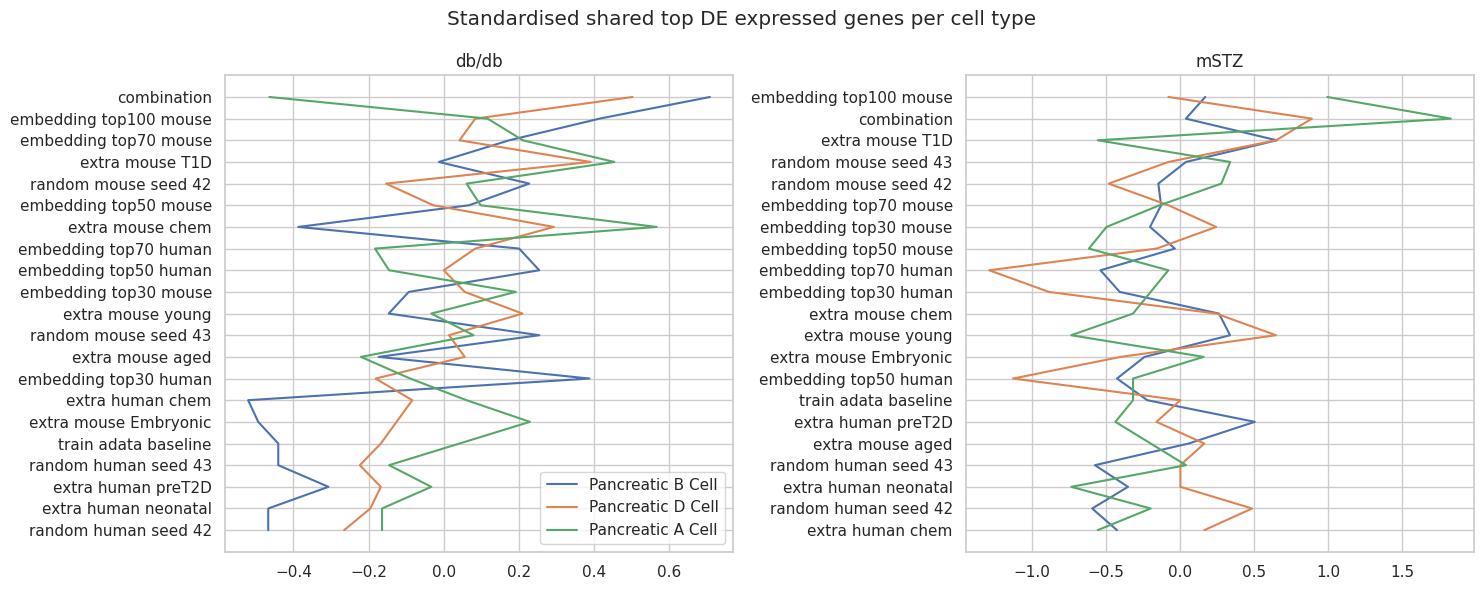

In [330]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting a scientific and white theme using seaborn
sns.set_theme(style="whitegrid")

# Creating a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plotting for medians_dbdb
axes[0].plot(medians_dbdb["pancreatic B cell"], medians_dbdb["dataset"], label='Pancreatic B Cell')
axes[0].plot(medians_dbdb["pancreatic D cell"], medians_dbdb["dataset"], label='Pancreatic D Cell')
axes[0].plot(medians_dbdb["pancreatic A cell"], medians_dbdb["dataset"], label='Pancreatic A Cell')
#axes[0].set_xlim([0.2, 0.5])
axes[0].legend()
axes[0].set_title("db/db")

# Plotting for medians_mSTZ
axes[1].plot(medians_mSTZ["pancreatic B cell"], medians_mSTZ["dataset"], label='Pancreatic B Cell')
axes[1].plot(medians_mSTZ["pancreatic D cell"], medians_mSTZ["dataset"], label='Pancreatic D Cell')
axes[1].plot(medians_mSTZ["pancreatic A cell"], medians_mSTZ["dataset"], label='Pancreatic A Cell')
#axes[1].set_xlim([0.2, 0.5])
axes[1].set_title("mSTZ")

plt.suptitle("Standardised shared top DE expressed genes per cell type")
plt.tight_layout()
plt.savefig("./figs/per_cell_type_performance.png")
plt.show()


In [293]:
focused_columns_dbdb = ["result.type_B_pancreatic_cell_scores_corr_dbdb", 'result.pancreatic_A_cell_scores_corr_dbdb', 'result.pancreatic_D_cell_scores_corr_dbdb']
focused_columns_mSTZ = ["result.type_B_pancreatic_cell_scores_corr_mSTZ", 'result.pancreatic_A_cell_scores_corr_mSTZ', 'result.pancreatic_D_cell_scores_corr_mSTZ']

In [294]:
norm_df = results[focused_columns_dbdb+focused_columns_mSTZ]

In [295]:
standardised_df = norm_df.apply(lambda x: (x - x.mean()) / x.std())

In [296]:
standardised_df["dataset"] = [elm.split(".")[0].replace("_", " ") for elm in results["config.addl_dataset_train"]]

In [297]:
medians = standardised_df.groupby("dataset").median().reset_index()

In [298]:
medians_df = results.groupby("config.addl_dataset_train")

In [299]:
medians_df = medians_df[["result.scores_corr_dbdb","result.scores_corr_mSTZ"]].median().reset_index()

In [300]:
medians_df["config.addl_dataset_train"] = [elm.split(".")[0].replace("_", " ") for elm in medians_df["config.addl_dataset_train"]]

In [301]:
medians = standardised_df.groupby("dataset").median().reset_index()

In [302]:
medians = medians.merge(medians_df, right_on="config.addl_dataset_train", left_on="dataset")

In [309]:
medians_dbdb = medians[["dataset"] + focused_columns_dbdb + ["result.scores_corr_dbdb"]]
medians_mSTZ = medians[["dataset"] + focused_columns_mSTZ + ["result.scores_corr_mSTZ"]]

In [310]:
rename_dict = {"result.type_B_pancreatic_cell_scores_corr_dbdb": "pancreatic B cell",
               "result.pancreatic_A_cell_scores_corr_dbdb": "pancreatic A cell",
               "result.pancreatic_D_cell_scores_corr_dbdb": "pancreatic D cell",
               "result.type_B_pancreatic_cell_scores_corr_mSTZ": "pancreatic B cell",
               "result.pancreatic_A_cell_scores_corr_mSTZ": "pancreatic A cell",
               "result.pancreatic_D_cell_scores_corr_mSTZ": "pancreatic D cell",}

In [311]:
medians_dbdb.rename(rename_dict, inplace=True, axis=1)

In [312]:
medians_mSTZ.rename(rename_dict, inplace=True, axis=1)

In [313]:
medians_dbdb.sort_values("result.scores_corr_dbdb", inplace=True)
medians_mSTZ.sort_values("result.scores_corr_mSTZ", inplace=True)

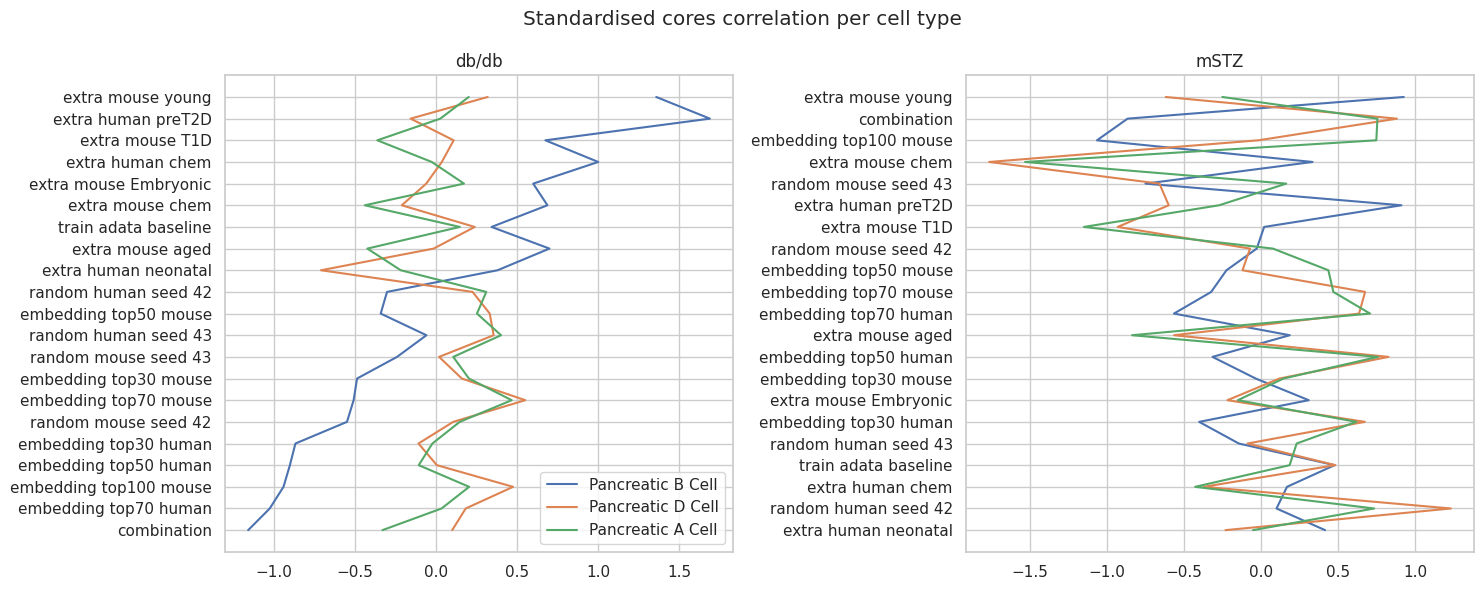

In [314]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting a scientific and white theme using seaborn
sns.set_theme(style="whitegrid")

# Creating a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plotting for medians_dbdb
axes[0].plot(medians_dbdb["pancreatic B cell"], medians_dbdb["dataset"], label='Pancreatic B Cell')
axes[0].plot(medians_dbdb["pancreatic D cell"], medians_dbdb["dataset"], label='Pancreatic D Cell')
axes[0].plot(medians_dbdb["pancreatic A cell"], medians_dbdb["dataset"], label='Pancreatic A Cell')
#axes[0].set_xlim([0.2, 0.5])
axes[0].legend()
axes[0].set_title("db/db")

# Plotting for medians_mSTZ
axes[1].plot(medians_mSTZ["pancreatic B cell"], medians_mSTZ["dataset"], label='Pancreatic B Cell')
axes[1].plot(medians_mSTZ["pancreatic D cell"], medians_mSTZ["dataset"], label='Pancreatic D Cell')
axes[1].plot(medians_mSTZ["pancreatic A cell"], medians_mSTZ["dataset"], label='Pancreatic A Cell')
#axes[1].set_xlim([0.2, 0.5])
axes[1].set_title("mSTZ")

plt.suptitle("Standardised cores correlation per cell type")
plt.tight_layout()
plt.savefig("./figs/per_cell_type_performance_scores.png")
plt.show()


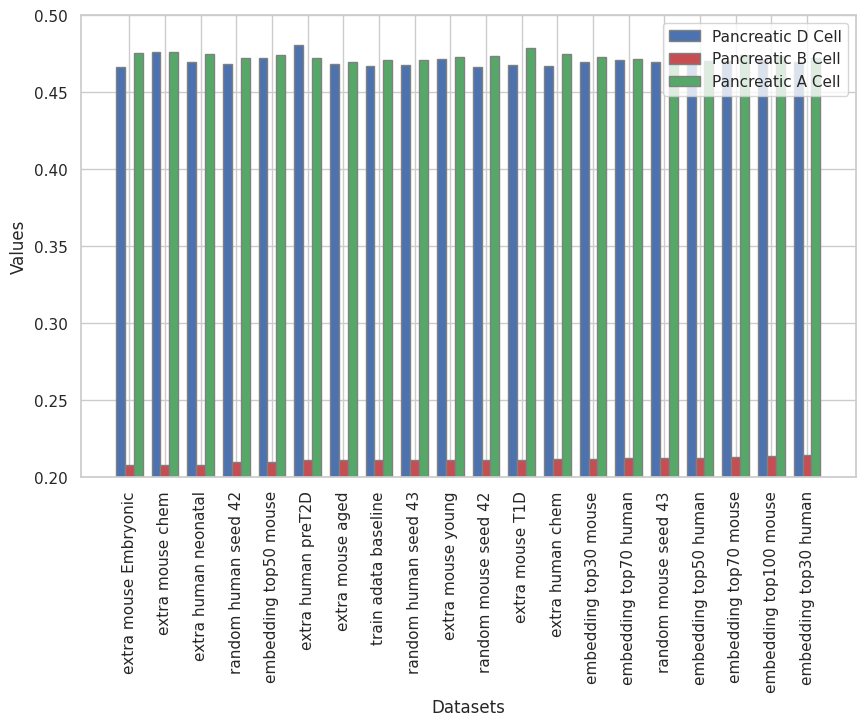

In [415]:
# Plotting the bar plot
plt.figure(figsize=(10, 6))

# Width of a bar
bar_width = 0.25

# Positions of the bars
r1 = np.arange(len(medians))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Creating the bar plots
plt.bar(r1, medians["pancreatic D cell"], color='b', width=bar_width, edgecolor='grey', label='Pancreatic D Cell')
plt.bar(r2, medians["pancreatic B cell"], color='r', width=bar_width, edgecolor='grey', label='Pancreatic B Cell')
plt.bar(r3, medians["pancreatic A cell"], color='g', width=bar_width, edgecolor='grey', label='Pancreatic A Cell')

# Add some labels and title
plt.xlabel('Datasets')
plt.ylabel('Values')
plt.xticks([r + bar_width for r in range(len(medians))], medians["config.addl_dataset_train"], rotation=90)
plt.ylim([0.2, 0.5])

plt.legend()
plt.show()

In [156]:
medians_dbdb.sort_values("pancreatic B cell", ascending=False, inplace=True)

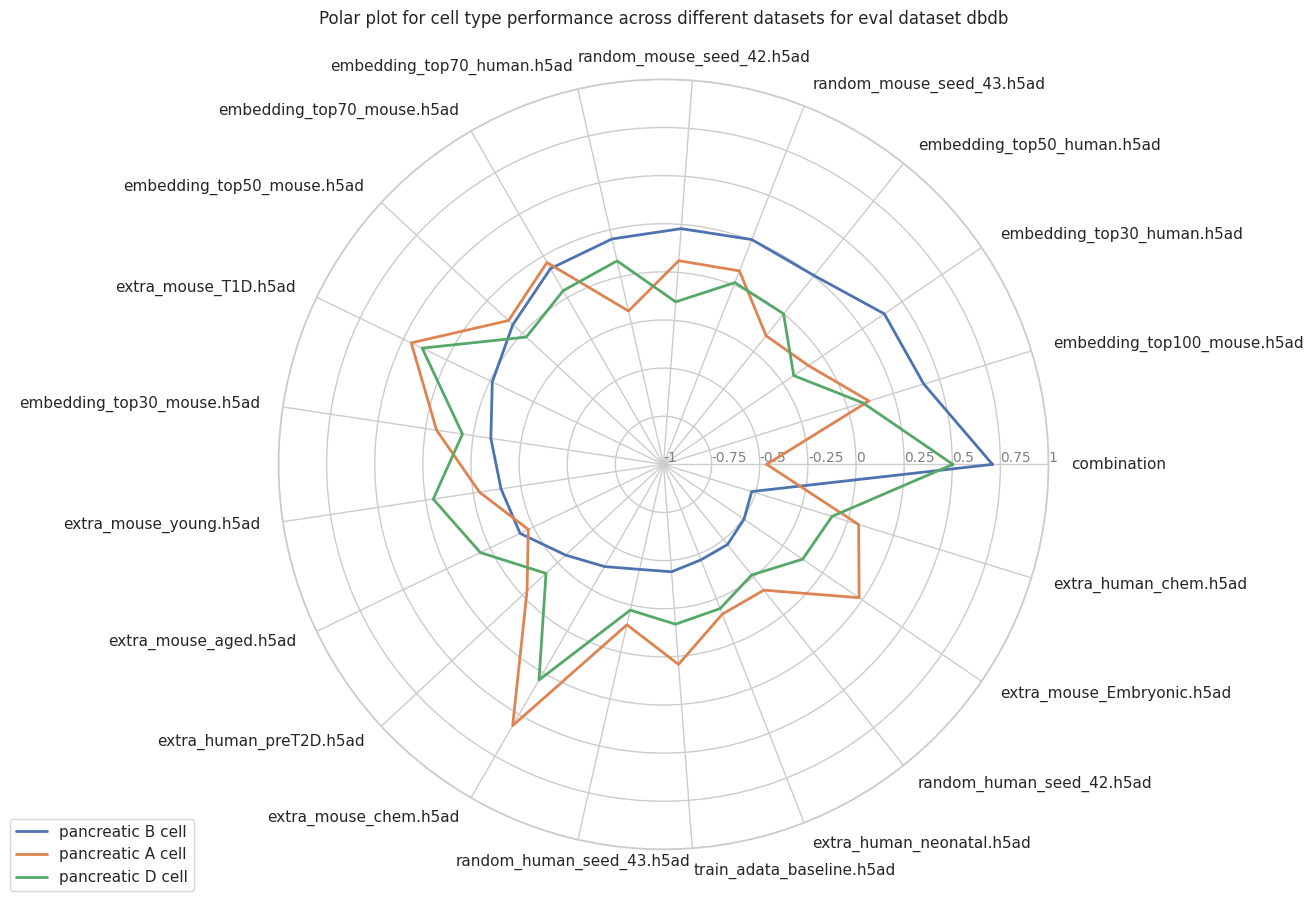

In [161]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import pi

# Number of variables
categories = list(medians_dbdb['dataset'])
N = len(categories)

# What will be the angle of each axis in the plot?
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(12, 10))
# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1], 
           ["-1", "-0.75", "-0.5", "-0.25", "0", "0.25", "0.5", "0.75", "1"], 
           color="grey", size=10)
plt.ylim(-1, 1)
plt.title("Polar plot for cell type performance across different datasets for eval dataset dbdb", pad=40)

# Plot each line
for column in medians_dbdb.columns[1:]:
    values = medians_dbdb[column].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=column)
    
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(-0.1, 0.05))

# Move the radial labels to be further from the plot
for label, angle in zip(ax.get_xticklabels(), angles):
    if angle == 0:
        label.set_horizontalalignment('left')
    elif angle == 1.4959965017094252:
        label.set_horizontalalignment('center')
    elif angle == 4.487989505128276:
        label.set_horizontalalignment('center')
    elif angle <= 0.5*pi:
        label.set_horizontalalignment('left')
    elif angle <= pi:
        label.set_horizontalalignment('right')
    elif angle <= 1.5*pi:
        label.set_horizontalalignment('right')
    else:
        label.set_horizontalalignment('left')
        
# Show the plot
plt.show()

## Swarm plot

In [363]:
results.columns

Index(['_id', 'config.overwrite', 'config.db_collection',
       'config.addl_dataset_train', 'config.cov_embed_dims',
       'config.dataset_ground_truth1', 'config.dataset_ground_truth2',
       'config.dataset_to_predict', 'config.dropout_rate', 'config.embed_ct',
       'config.kl_weight', 'config.learning_rate', 'config.max_epochs',
       'config.n_hidden', 'config.n_latent', 'config.n_layers',
       'config.save_folder_name', 'config.save_models', 'config.seed',
       'config.shared_top', 'config.weight_decay', 'result.kl_weight',
       'result.train_loss_step', 'result.elbo_validation',
       'result.reconstruction_loss_validation', 'result.kl_local_validation',
       'result.kl_global_validation', 'result.dbdb_r2_validation_eval',
       'result.mSTZ_r2_validation_eval', 'result.mean_r2_validation_eval',
       'result.train_loss_epoch', 'result.r2_dbdb_healthy',
       'result.r2_dbdb_OOD', 'result.r2_mSTZ_healthy', 'result.r2_mSTZ_OOD',
       'result.shared_top_genes_d

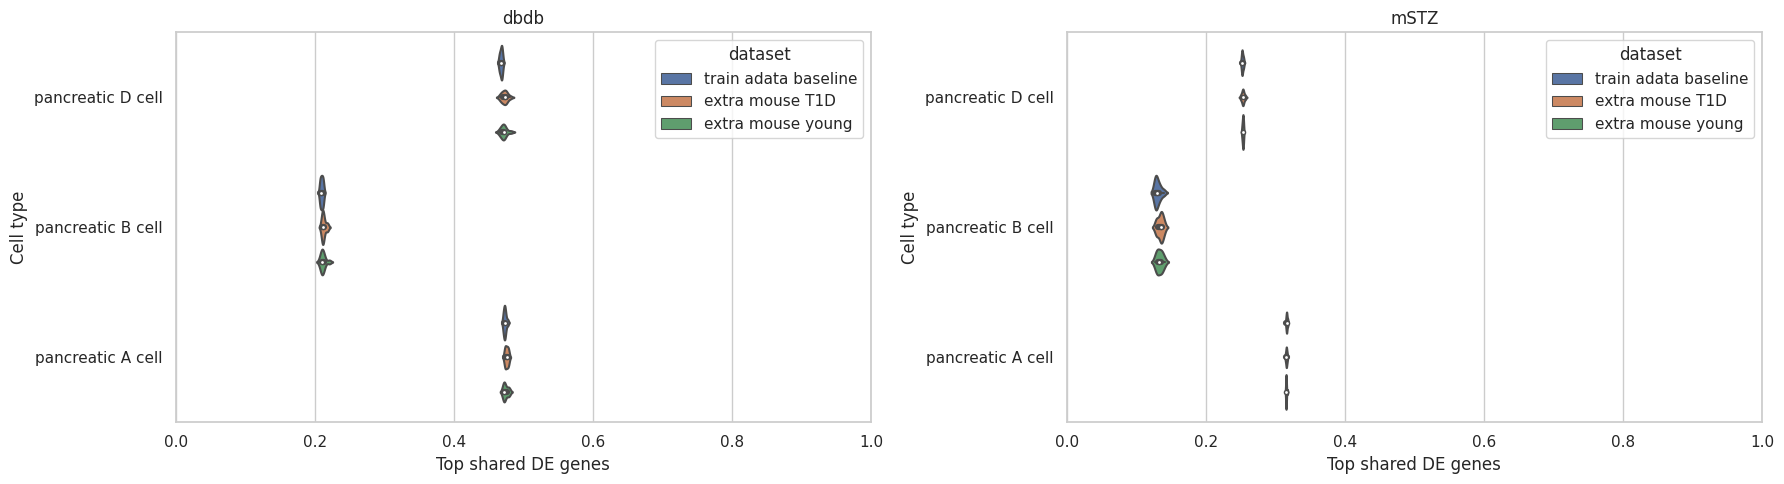

In [427]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming results is your original DataFrame
# Add your DataFrame loading code here if necessary

# Process DataFrame for 'dbdb'
swarm_columns_dbdb = ['config.addl_dataset_train', 
                      'result.pancreatic_D_cell_shared_top_genes_dbdb', 
                      'result.type_B_pancreatic_cell_shared_top_genes_dbdb', 
                      'result.pancreatic_A_cell_shared_top_genes_dbdb']

df_long_dbdb = pd.melt(results[swarm_columns_dbdb], 
                       id_vars='config.addl_dataset_train', 
                       value_vars=['result.pancreatic_D_cell_shared_top_genes_dbdb', 
                                   'result.type_B_pancreatic_cell_shared_top_genes_dbdb', 
                                   'result.pancreatic_A_cell_shared_top_genes_dbdb'], 
                       var_name='cell_type', value_name='top_genes')

# Filter and Map for 'dbdb'
df_long_dbdb = df_long_dbdb[df_long_dbdb["config.addl_dataset_train"].isin(["train_adata_baseline.h5ad", 
                                                                            "extra_mouse_T1D.h5ad", 
                                                                            "extra_mouse_young.h5ad"])]

df_long_dbdb["dataset"] = [elm.split(".")[0].replace("_", " ") 
                                             for elm in df_long_dbdb["config.addl_dataset_train"]]

map_dict_dbdb = {'result.pancreatic_D_cell_shared_top_genes_dbdb': "pancreatic D cell",
                 'result.type_B_pancreatic_cell_shared_top_genes_dbdb': "pancreatic B cell",
                 'result.pancreatic_A_cell_shared_top_genes_dbdb': "pancreatic A cell"}

df_long_dbdb["category"] = df_long_dbdb.cell_type.replace(map_dict_dbdb)

# Process DataFrame for 'mSTZ' (Replace column names as per your DataFrame)
# Assuming column names and structure are similar but with 'mSTZ' instead of 'dbdb'
swarm_columns_mSTZ = ['config.addl_dataset_train', 
                      'result.pancreatic_D_cell_shared_top_genes_mSTZ', 
                      'result.type_B_pancreatic_cell_shared_top_genes_mSTZ', 
                      'result.pancreatic_A_cell_shared_top_genes_mSTZ']

df_long_mSTZ = pd.melt(results[swarm_columns_mSTZ], 
                       id_vars='config.addl_dataset_train', 
                       value_vars=['result.pancreatic_D_cell_shared_top_genes_mSTZ', 
                                   'result.type_B_pancreatic_cell_shared_top_genes_mSTZ', 
                                   'result.pancreatic_A_cell_shared_top_genes_mSTZ'], 
                       var_name='cell_type', value_name='top_genes')

# Filter and Map for 'mSTZ'
df_long_mSTZ = df_long_mSTZ[df_long_mSTZ["config.addl_dataset_train"].isin(["train_adata_baseline.h5ad", 
                                                                            "extra_mouse_T1D.h5ad", 
                                                                            "extra_mouse_young.h5ad"])]

df_long_mSTZ["dataset"] = [elm.split(".")[0].replace("_", " ") 
                                             for elm in df_long_mSTZ["config.addl_dataset_train"]]

map_dict_mSTZ = {'result.pancreatic_D_cell_shared_top_genes_mSTZ': "pancreatic D cell",
                 'result.type_B_pancreatic_cell_shared_top_genes_mSTZ': "pancreatic B cell",
                 'result.pancreatic_A_cell_shared_top_genes_mSTZ': "pancreatic A cell"}

df_long_mSTZ["category"] = df_long_mSTZ.cell_type.replace(map_dict_mSTZ)

# Create Subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

# Plot for 'dbdb'
sns.violinplot(y='category', x='top_genes', hue='dataset', data=df_long_dbdb, ax=axes[0])
axes[0].set_xlim([0, 1])
axes[0].set_xlabel("Top shared DE genes")
axes[0].set_ylabel("Cell type")
axes[0].set_title("dbdb")

# Plot for 'mSTZ'
sns.violinplot(y='category', x='top_genes', hue='dataset', data=df_long_mSTZ, ax=axes[1])
axes[1].set_xlim([0, 1])
axes[1].set_xlabel("Top shared DE genes")
axes[1].set_ylabel("Cell type")
axes[1].set_title("mSTZ")

plt.tight_layout()
plt.savefig("./figs/violin_plt_of_ct_comparison.png")
plt.show()


## GSEA

Steps:
- get the associated datasets **DONE**
- calculate the GT GSEA **DONE**, prepare plots
- make the code for the rest of the calculations **DONE**

### dbdb

Datsets are in the df `configs_dbdb_df`, I need to read everything from there.

In [441]:
import os
import numpy as np
import pandas as pd

top_preds_dbdb = {}
for index, row in configs_dbdb_df.iterrows():
    save_folder_name = "datasets_for_GSEA"  
    # Construct the directory path for the saved models
    save_dir = f"/d/hpc/projects/FRI/DL/mo6643/MSC/cross_species_prediction_save/{save_folder_name}"
    save_folder = f"transVAE_train_{row['config.addl_dataset_train']}_hid{row['config.n_hidden']}_lat{int(row['config.n_latent'])}_lr{row['config.learning_rate']}_cov{int(row['config.cov_embed_dims'])}_ep{int(row['config.max_epochs'])}_ly{row['config.n_layers']}_dr{row['config.dropout_rate']}_kl{row['config.kl_weight']}_wd{row['config.weight_decay']}_s{int(row['config.seed'])}"
    dir_path = os.path.join(save_dir, save_folder)
    
    addl_dataset = row["config.addl_dataset_train"].split(".")[0]
    
    # Load the prediction file if it exists
    pred_file = os.path.join(dir_path, "preds_dbdb_OOD.npy")
    if os.path.exists(pred_file):
        preds = np.load(pred_file)
        top_preds_dbdb[addl_dataset] = preds
    else:
        print(f"Prediction file not found for configuration: {save_folder}")

Prediction file not found for configuration: transVAE_train_combination_hid1000_lat512_lr0.0001_cov10_ep1500_ly8_dr0.0001_kl0.005_wd0.3_s42


Dealing withe the missing combinations dataset.

In [446]:
missing = "transVAE_train_combination_hid1000_lat512_lr0.0001_cov10_ep1500_ly8_dr0.0001_kl0.005_wd0.3_s42"
save_folder_name = "full_genes_big_data_w_and_wo_ct_encoding_10_reps"  
# Construct the directory path for the saved models
save_dir = f"/d/hpc/projects/FRI/DL/mo6643/MSC/cross_species_prediction_save/{save_folder_name}"
dir_path = os.path.join(save_dir, missing)
# Load the prediction file if it exists
pred_file = os.path.join(dir_path, "preds_dbdb_OOD.npy")
if os.path.exists(pred_file):
    preds = np.load(pred_file)
    top_preds_dbdb["combination"] = preds

#### Calculating the GT GSEA

In [335]:
import scanpy as sc
import gseapy as gp
import pandas as pd
from gseapy import Biomart

gt_dbdb = sc.read_h5ad("/d/hpc/projects/FRI/DL/mo6643/MSC/data/data_update_slack/data_splits/data_splits_train_merge/ground_truth/full_datasets/dbdb_ground_truth_cleanCT.h5ad")
gt_mSTZ = sc.read_h5ad("/d/hpc/projects/FRI/DL/mo6643/MSC/data/data_update_slack/data_splits/data_splits_train_merge/ground_truth/full_datasets/mSTZ_ground_truth_cleanCT.h5ad")

genes_considered = pd.read_table("/d/hpc/projects/FRI/DL/mo6643/MSC/data/data_update_slack/data_splits/data_splits_train_merge/make_big_dataset/genes_shared_across_datasets.txt")
gt_dbdb = gt_dbdb[:,gt_dbdb.var.index.isin(genes_considered.genes_shared_across_datasets.tolist())]
gt_mSTZ = gt_mSTZ[:,gt_mSTZ.var.index.isin(genes_considered.genes_shared_across_datasets.tolist())]

gt_dbdb.obs['stim'] = pd.Categorical(gt_dbdb.obs['disease'], categories=["T2D", "healthy"], ordered=True)
indices = gt_dbdb.obs.sort_values(['cell_type', 'stim']).index
gt_dbdb = gt_dbdb[indices,:]

bm = Biomart()
m2h = bm.query(dataset='mmusculus_gene_ensembl',
               attributes=['ensembl_gene_id','external_gene_name',
                           'hsapiens_homolog_ensembl_gene',
                           'hsapiens_homolog_associated_gene_name'])

new_var = gt_dbdb.var.merge(m2h, left_index=True, right_on="ensembl_gene_id", how = "left")

new_var.index = new_var["hsapiens_homolog_associated_gene_name"]

gt_dbdb.var = new_var

In [345]:
gt_mSTZ.obs.cell_type.unique()

['pancreatic A cell', 'pancreatic D cell', 'type B pancreatic cell']
Categories (3, object): ['type B pancreatic cell', 'pancreatic A cell', 'pancreatic D cell']

In [346]:
gt_mSTZ.obs['stim'] = pd.Categorical(gt_mSTZ.obs['disease'], categories=["T2D", "healthy"], ordered=True)
indices = gt_mSTZ.obs.sort_values(['cell_type', 'stim']).index
gt_mSTZ = gt_mSTZ[indices,:]
gt_mSTZ = gt_mSTZ[gt_mSTZ.obs.cell_type == "type B pancreatic cell"]

new_var = gt_mSTZ.var.merge(m2h, left_index=True, right_on="ensembl_gene_id", how = "left")

new_var.index = new_var["hsapiens_homolog_associated_gene_name"]

gt_mSTZ.var = new_var

In [349]:
gt_dbdb = sc.read_h5ad("/d/hpc/projects/FRI/DL/mo6643/MSC/data/data_update_slack/data_splits/data_splits_train_merge/ground_truth/full_datasets/dbdb_ground_truth_cleanCT.h5ad")
genes_considered = pd.read_table("/d/hpc/projects/FRI/DL/mo6643/MSC/data/data_update_slack/data_splits/data_splits_train_merge/make_big_dataset/genes_shared_across_datasets.txt")
gt_dbdb = gt_dbdb[:,gt_dbdb.var.index.isin(genes_considered.genes_shared_across_datasets.tolist())]

gt_dbdb.obs['stim'] = pd.Categorical(gt_dbdb.obs['disease'], categories=["T2D", "healthy"], ordered=True)
indices = gt_dbdb.obs.sort_values(['cell_type', 'stim']).index
gt_dbdb = gt_dbdb[indices,:]
gt_dbdb = gt_dbdb[gt_dbdb.obs.cell_type == "type B pancreatic cell"]

new_var = gt_dbdb.var.merge(m2h, left_index=True, right_on="ensembl_gene_id", how = "left")

new_var.index = new_var["hsapiens_homolog_associated_gene_name"]

gt_dbdb.var = new_var

In [350]:
import time
t1 = time.time()
# NOTE: To speed up, use gp.prerank instead with your own ranked list.
res_KEGG_GT = gp.gsea(data=gt_dbdb.to_df().T, # row -> genes, column-> samples
                      gene_sets="KEGG_2019_Mouse",
                      cls=gt_dbdb.obs.stim,
                      permutation_num=1000,
                      permutation_type='phenotype',
                      outdir=None,
                      method='s2n', # signal_to_noise
                      threads= 64,
                      verbose = True)
t2=time.time()
print(t2-t1)

2023-12-19 13:24:56,412 [INFO] Parsing data files for GSEA.............................
2023-12-19 13:25:00,185 [INFO] Enrichr library gene sets already downloaded in: /d/hpc/home/mo6643/.cache/gseapy, use local file
2023-12-19 13:25:00,197 [INFO] 0025 gene_sets have been filtered out when max_size=500 and min_size=15
2023-12-19 13:25:00,199 [INFO] 0278 gene_sets used for further statistical testing.....
2023-12-19 13:25:00,200 [INFO] Start to run GSEA...Might take a while..................
2023-12-19 13:27:37,333 [INFO] Congratulations. GSEApy ran successfully.................



162.04306650161743


In [353]:
import time
t1 = time.time()
# NOTE: To speed up, use gp.prerank instead with your own ranked list.
res_KEGG_GT_mSTZ = gp.gsea(data=gt_mSTZ.to_df().T, # row -> genes, column-> samples
                           gene_sets="KEGG_2019_Mouse",
                           cls=gt_mSTZ.obs.stim,
                           permutation_num=1000,
                           permutation_type='phenotype',
                           outdir=None,
                           method='s2n', # signal_to_noise
                           threads= 64,
                           verbose = True)
t2=time.time()
print(t2-t1)

2023-12-19 13:30:59,692 [INFO] Parsing data files for GSEA.............................
2023-12-19 13:31:01,126 [INFO] Enrichr library gene sets already downloaded in: /d/hpc/home/mo6643/.cache/gseapy, use local file
2023-12-19 13:31:01,145 [INFO] 0026 gene_sets have been filtered out when max_size=500 and min_size=15
2023-12-19 13:31:01,146 [INFO] 0277 gene_sets used for further statistical testing.....
2023-12-19 13:31:01,146 [INFO] Start to run GSEA...Might take a while..................
2023-12-19 13:32:25,106 [INFO] Congratulations. GSEApy ran successfully.................



85.57210183143616


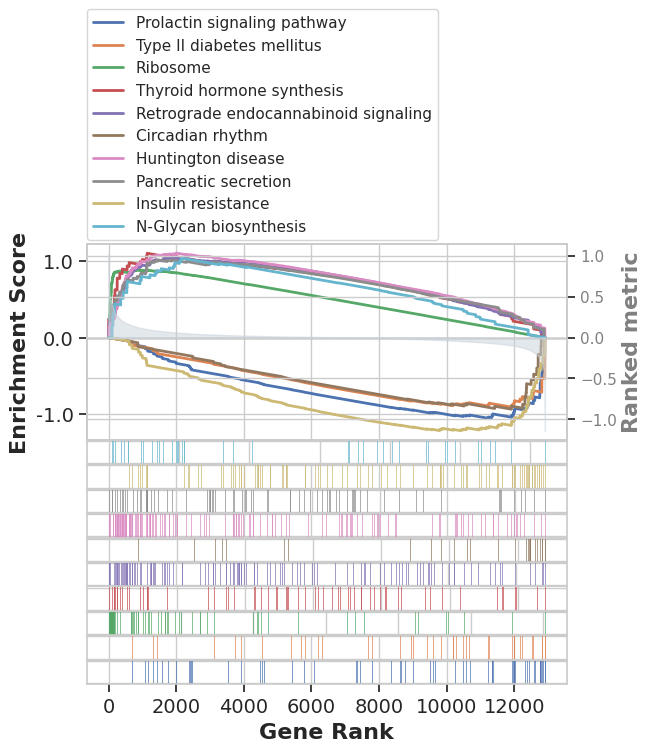

In [467]:
term = res_KEGG_GT.res2d.Term
#gp.gseaplot(res.ranking, term=term[i], **res.results[term[i]])
axs = res_KEGG_GT.plot(terms=term[:10])

### Making the rest of the calculations -> slurm

### dbdb

In [331]:
import functools
import os

In [333]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Function to process and extract data
def process_data(directory, top_100):
    files = os.listdir(directory)
    files = [file for file in files if "csv" in file]

    enr_dfs = dict()
    for file in files:
        name = file.replace("_enrichment_df.csv", "")
        enr_dfs[name] = pd.read_csv(f"{directory}/{file}")

    final_results = []
    for name, df in enr_dfs.items():
        tmp_paths = set(df.Term[0:100].tolist())
        number_of_paths = len(top_100.intersection(tmp_paths))
        final_results.append((name, number_of_paths))
    
    return pd.DataFrame(final_results, columns=["dataset", "num_paths"]).sort_values("num_paths", ascending=True)


In [355]:
# Assuming gt_enr_df is already defined
gt_enr_df = res_KEGG_GT.res2d
gt_enr_df_mSTZ = res_KEGG_GT_mSTZ.res2d

# Process dbdb data
final_results_dbdb = process_data("./GSEA_results_ct/dbdb", set(gt_enr_df.Term[0:100].tolist()))

# Process mSTZ data
final_results_mSTZ = process_data("./GSEA_results_ct/mSTZ", set(gt_enr_df_mSTZ.Term[0:100].tolist()))

In [356]:
embedding_based_human = ['embedding_top30_human','embedding_top50_human','embedding_top70_human']
embedding_based_mouse = ['embedding_top100_mouse', 'embedding_top30_mouse', 'embedding_top50_mouse', 'embedding_top70_mouse']
baseline = ['train_adata_baseline']
extra_human = ['extra_human_chem', 'extra_human_neonatal', 'extra_human_preT2D']
extra_mouse = ['extra_mouse_Embryonic', 'extra_mouse_T1D', 'extra_mouse_aged', 'extra_mouse_chem', 'extra_mouse_young']
random = ['random_human_seed_42', 'random_human_seed_43', 'random_mouse_seed_42', 'random_mouse_seed_43']
combination = ["combination"]

In [357]:
# Create a mapping from dataset to dataset group
dataset_group_map = {ds: group for group, ds_list in 
                     zip(["Embedding based - Human", "Embedding based - Mouse", "Baseline", 
                          "Extra conditions - Human", "Extra conditions - Mouse", 
                          "Random sampling of cell types", "Combination of datasets"], 
                         [embedding_based_human, embedding_based_mouse, baseline, 
                          extra_human, extra_mouse, random, combination])
                     for ds in ds_list}

# Apply this mapping to the final_results DataFrame
final_results_dbdb['dataset_group'] = final_results_dbdb['dataset'].map(dataset_group_map)
final_results_mSTZ['dataset_group'] = final_results_mSTZ['dataset'].map(dataset_group_map)

In [358]:
palette = {
    "Embedding based - Human": "#4169E1",  # Royal blue
    "Embedding based - Mouse": "#77DD77",  # Pastel green
    "Baseline": "#FFD580",  # Light orange
    "Extra conditions - Human": "#FF6961",  # Pastel red
    "Extra conditions - Mouse": "#C3B1E1",  # Light purple
    "Random sampling of cell types": "#C8A165",  # Light brown
    "Combination of datasets": "#8B0000"  # Dark red
}

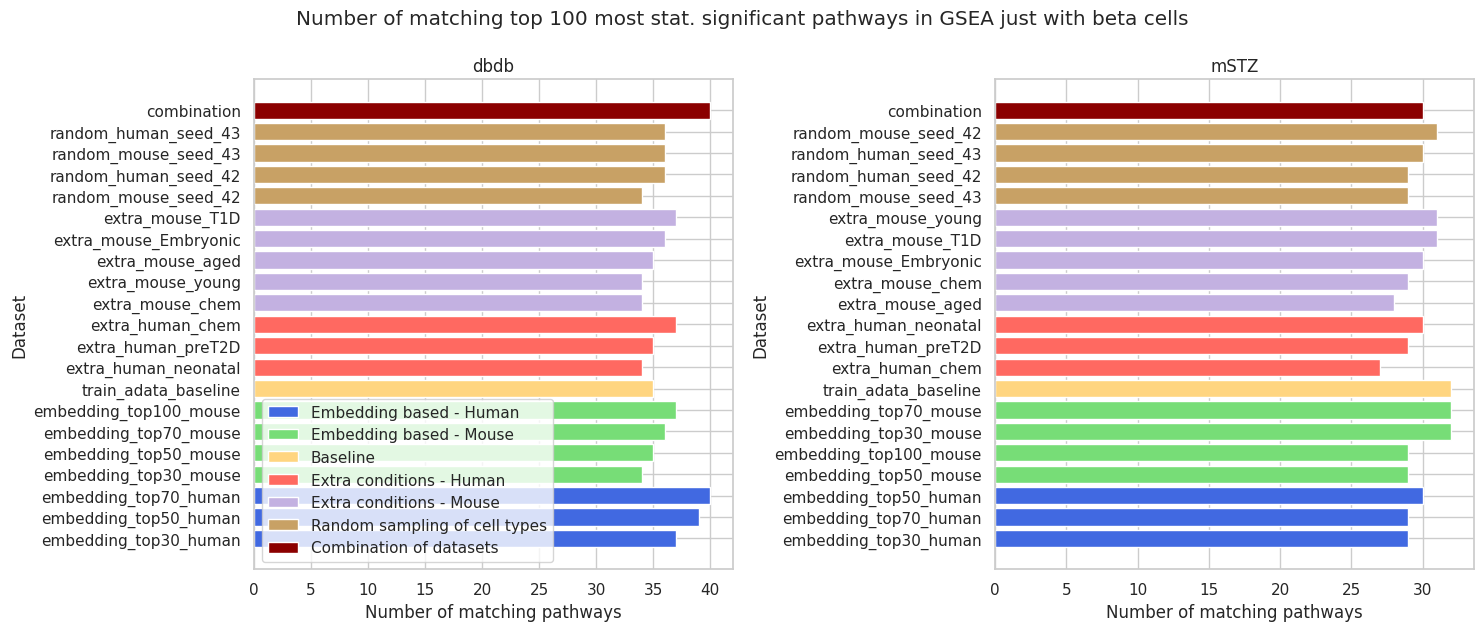

In [360]:
import matplotlib.pyplot as plt

# Plotting side by side with colored bars
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# dbdb plot with colored bars
for group in palette.keys():
    subset = final_results_dbdb[final_results_dbdb["dataset_group"] == group]
    axes[0].barh(y=subset.dataset, width=subset.num_paths, color=palette[group], label=group)
axes[0].set_xlabel('Number of matching pathways')
axes[0].set_ylabel('Dataset')
axes[0].set_title('dbdb')
axes[0].legend(loc="lower left")

# mSTZ plot with colored bars
for group in palette.keys():
    subset = final_results_mSTZ[final_results_mSTZ["dataset_group"] == group]
    axes[1].barh(y=subset.dataset, width=subset.num_paths, color=palette[group], label=group)
axes[1].set_xlabel('Number of matching pathways')
axes[1].set_ylabel('Dataset')
axes[1].set_title('mSTZ')

plt.tight_layout()
plt.suptitle("Number of matching top 100 most stat. significant pathways in GSEA just with beta cells", y=1.05)
plt.savefig("./figs/GSEA_comaprison_withing_groups_ct")
plt.show()


In [689]:
final_results_dbdb.columns

Index(['dataset', 'num_paths', 'dataset_group'], dtype='object')

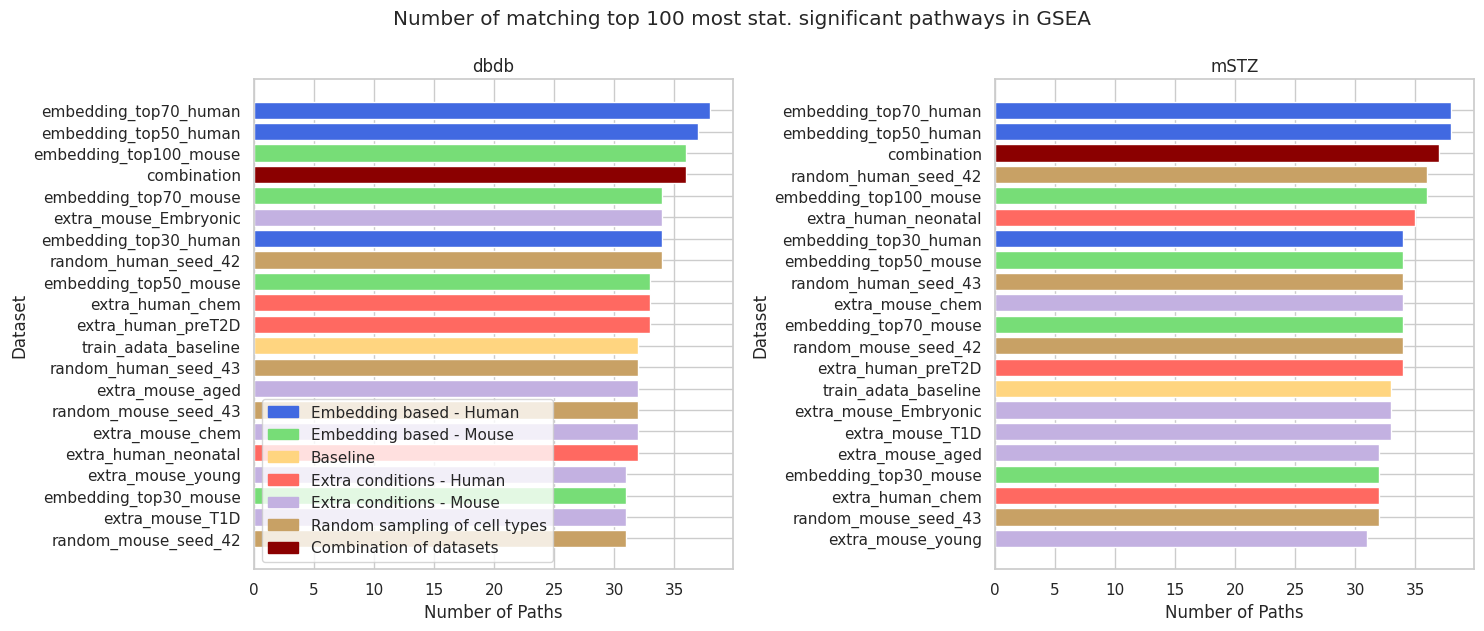

In [693]:
import matplotlib.pyplot as plt

# Sort the dataframes
final_results_dbdb = final_results_dbdb.sort_values("num_paths", ascending=True)
final_results_mSTZ = final_results_mSTZ.sort_values("num_paths", ascending=True)

# Plotting side by side with colored bars
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# dbdb plot with colored bars
for index, row in final_results_dbdb.iterrows():
    color = palette[row['dataset_group']]
    axes[0].barh(y=row['dataset'], width=row['num_paths'], color=color)
axes[0].set_xlabel('Number of Paths')
axes[0].set_ylabel('Dataset')
axes[0].set_title('dbdb')

# mSTZ plot with colored bars
for index, row in final_results_mSTZ.iterrows():
    color = palette[row['dataset_group']]
    axes[1].barh(y=row['dataset'], width=row['num_paths'], color=color)
axes[1].set_xlabel('Number of Paths')
axes[1].set_ylabel('Dataset')
axes[1].set_title('mSTZ')

# Adding a legend
axes[0].legend(handles=[plt.Rectangle((0,0),1,1, color=palette[label]) for label in palette], 
               labels=list(palette.keys()), loc="lower left")

plt.tight_layout()
plt.suptitle("Number of matching top 100 most stat. significant pathways in GSEA", y=1.05)
plt.savefig("./figs/GSEA_global_comparison")
plt.show()


In [259]:
import pickle

In [261]:
with open("/d/hpc/projects/FRI/DL/mo6643/MSC/cross_species_prediction_save/GSEA_results_objects/dbdb/dbdb_combination_gsea_objects.pkl", "rb") as file:
    gsea = pickle.load(file)

In [263]:
gsea.res2d

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes,dataset_train
0,gsea,PI3K-Akt signaling pathway,0.58103,2.974676,0.0,0.0,0.0,102/289,24.76%,COL4A3;FGF23;COL4A6;FGF10;EIF4E1B;EPO;TNC;LPAR...,combination
1,gsea,Human papillomavirus infection,0.51776,2.809036,0.0,0.0,0.0,88/270,31.78%,COL4A3;WNT8A;COL4A6;TBPL2;TNC;ATP6V0D2;WNT8B;C...,combination
2,gsea,Serotonergic synapse,0.607744,2.803585,0.0,0.0,0.0,33/87,24.71%,PLA2G4D;HTR4;GABRB2;CACNA1S;ALOX12;PLA2G4E;GNG...,combination
3,gsea,JAK-STAT signaling pathway,0.614515,2.751606,0.0,0.0,0.0,43/113,27.07%,IL12A;IL21R;IFNG;EPO;IL13RA2;IFNE;IL5RA;IL19;I...,combination
4,gsea,Wnt signaling pathway,0.555179,2.742057,0.0,0.0,0.0,36/128,22.31%,WNT8A;NKD1;WNT8B;LEF1;RSPO2;SFRP2;FZD10;RSPO1;...,combination
...,...,...,...,...,...,...,...,...,...,...,...
275,gsea,mRNA surveillance pathway,-0.224857,-0.711133,0.945344,0.910456,1.0,71/71,91.72%,PPP1CB;PAPOLA;MSI2;PPP1CA;SRRM1;PPP2R5C;UPF3B;...,combination
276,gsea,Chronic myeloid leukemia,-0.186499,-0.684039,0.920792,0.893314,1.0,68/68,81.45%,GADD45G;KRAS;ARAF;GADD45B;MAP2K2;MAPK3;BRAF;PT...,combination
277,gsea,RNA transport,0.204665,0.681678,0.948875,0.902068,1.0,33/118,52.54%,EIF4E1B;POM121L2;NXF3;NUP210L;PABPC4L;EIF2B4;T...,combination
278,gsea,Ubiquitin mediated proteolysis,0.16598,0.55746,0.995789,0.97481,1.0,33/118,56.83%,BIRC7;AIRE;UBE2U;CDC20;SKP2;SOCS1;UBA7;DET1;UB...,combination


In [264]:
results_small_top_shared = seml.get_results("final_full_CT_10reps", to_data_frame=True, parallel=True)

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

In [266]:
results_small_top_shared["result.shared_top_genes_dbdb"].unique()

array([0.004, 0.003, 0.005, 0.007, 0.006])

### Making gene plots